# Mean and Standard Deviation

Why do we need standard deviation? We will demonstrate its usefulness by studying a temperature dataset. 

## The Temperature Dataset

This dataset covers a variety of cities in the United States across all States and Territories. For each city, we have the average temperature in each month. The unit of observation is at the city/month level. We have variables for the state, the city, the month and the average temperature.

The dataset, *TempCitiesUSA.csv*, can be downloaded [here](../data/TempCitiesUSA.csv).

In [5]:
# Load in Data Tools
# For Reading/Loading Data
library(readr)
library(tibble)
library(dplyr)
library(ggplot2)
# Load in Data
df_temp <- read_csv('../data/TempCitiesUSA.csv')

Parsed with column specification:
cols(
  state = col_character(),
  city = col_character(),
  month = col_double(),
  temp.f = col_double()
)


## Listing Variables in the Dataset

We can see that the state and city variables are string variables. We can show unique states and cities by months.

In [7]:
mtcars %>%
  group_by(cyl, vs) %>%
  summarize(count = n()) %>%
  spread(vs, count)

value       
1  AK          
2  AL          
3  AMER SAMOA  
4  AR          
5  AZ          
6  CA          
7  CA.         
8  CAROLINE IS.
9  CO          
10 CT          
11 D.C.        
12 DE          
13 FL          
14 GA          
15 HI          
16 IA          
17 ID          
18 IL          
19 IN          
20 KS          
21 KY          
22 LA          
23 MA          
24 MARSHALL IS 
25 MARSHALL IS.
26 MD          
27 ME          
28 MI          
29 MN          
30 MO          
31 MS          
32 MT          
33 NC          
34 ND          
35 NE          
36 NH          
37 NJ          
38 NM          
39 NV          
40 NY          
41 OH          
42 OK          
43 OR          
44 PA          
45 PA.         
46 PC          
47 PR          
48 RI          
49 SC          
50 SD          
51 TN          
52 TX          
53 UT          
54 VA          
55 VT          
56 WA          
57 WI          
58 WV          
59 WY

# Data Examples

## College Education Share and Hourly Wage

Two variables:

1. Fraction of individual with college degree in a state
    + this is in Fraction units, the minimum is 0.00, the maximum is 100 percent, which is 1.00
2. Average hourly salary in the state
    + this is in Dollar units

In [13]:
# Load in Data Tools
# For Reading/Loading Data
library(readr)
library(tibble)
library(dplyr)
library(ggplot2)
# Load in Data
df_wgedu <- read_csv('../data/EPIStateEduWage2017.csv')

Parsed with column specification:
cols(
  State = col_character(),
  Share.College.Edu = col_double(),
  Hourly.Salary = col_double()
)


## A Scatter Plot

We can Visualize the Data with a Scatter Plot. There seems to be a positive relationship between the share of individuals in a state with college education, and the average hourly salary in that state. 

While most states are along the trend line, we have some states, likw WY, that are outliers. WY has high hourly salary but low share with college education.

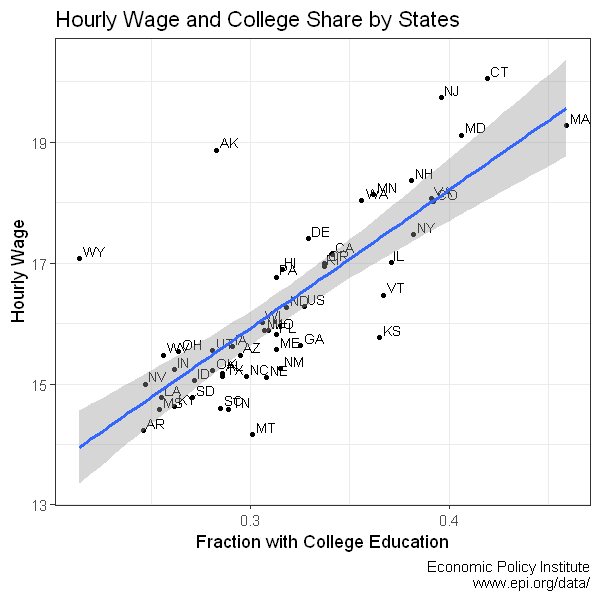

In [14]:
# Control Graph Size
options(repr.plot.width = 5, repr.plot.height = 5)
# Draw Scatter Plot
# 1. specify x and y
# 2. label each state
# 3. add in trend line
suppressMessages(print(
    ggplot(df_wgedu, aes(x=Share.College.Edu, y=Hourly.Salary)) +
      geom_point(size=1) +
      geom_text(aes(label=State), size=3, hjust=-.2, vjust=-.2) +
      geom_smooth(method=lm) +
      labs(title = 'Hourly Wage and College Share by States',
           x = 'Fraction with College Education',
           y = 'Hourly Wage',
           caption = 'Economic Policy Institute\n www.epi.org/data/') +
      theme_bw()
))

## Standard Deviations and Coefficient of Variation

The two variables above are in different units. We first calculate mean, standard deviation, and covariance. With just these, it is hard to compare the standard deviation of the two variables, which are in different scales. 

The sample standard deviations for the two variables are: $0.051$ and $1.51$, in fraction and dollar units. Can we say the hourly salary has a larger standard deviation? But it is just a different scale. $1.51$ is a large number, but that does not mean that variable has greater variation than the fraction with college education variable. 

Converting the Statistics to Coefficient of Variations, now we have: $0.16$ and $0.09$. Because of the division, these are both in fraction units--standard deviations as a fraction of the mean. Now these are more comparable.

In [15]:
# We can compute the three basic statistics
stats.msdv <- list(
              # Mean, SD and Var for the College Share variable
              Shr.Coll.Mean = mean(df_wgedu$Share.College.Edu), 
              Shr.Coll.Std = sd(df_wgedu$Share.College.Edu),
              Shr.Coll.Var = var(df_wgedu$Share.College.Edu),
    
              # Mean, SD and Var for the Hourly Wage Variable
              Hr.Wage.Mean = mean(df_wgedu$Hourly.Salary),                            
              Hr.Wage.Std = sd(df_wgedu$Hourly.Salary),
              Hr.Wage.Var = var(df_wgedu$Hourly.Salary)
              )

# We can compute the three basic statistics
stats.coefvari <- list(              
              # Coefficient of Variation
              Shr.Coll.Coef.Variation = (stats.msdv$Shr.Coll.Std)/(stats.msdv$Shr.Coll.Mean),
              Hr.Wage.Coef.Variation = (stats.msdv$Hr.Wage.Std)/(stats.msdv$Hr.Wage.Mean)
              )

# Let's Print the Statistics we Computed
as_tibble(stats.msdv)
as_tibble(stats.coefvari)

Shr.Coll.Mean Shr.Coll.Std Shr.Coll.Var Hr.Wage.Mean Hr.Wage.Std Hr.Wage.Var
1 0.3164706     0.05135109   0.002636934  16.29961     1.509687    2.279156

Shr.Coll.Coef.Variation Hr.Wage.Coef.Variation
1 0.1622618               0.09262108

## Covariance and Correlation

For covariance, hard to tell whether it is large or small. To make comparisons possible, we calculate coefficient of variations and correlation statistics.

The covariance we get is positive: $0.06$, but is this actually large positive relationship? $0.06$ seems like a small number. 

Rescaling covariance to correlation, the correlation between the two variables is: $0.78$. Since the correlation of two variable is beloww $-1$ and $+1$, we can now say actually the two variables are very positively related. Higher share of individuals with college education is strongly positively correlated with higher hourly salary. 

In [16]:
# We can compute the three basic statistics
states.covcor <- list(              
              # Covariance between the two variables
              Shr.Wage.Cov = cov(df_wgedu$Hourly.Salary,
                                 df_wgedu$Share.College.Edu),        
              # Correlation 
              Shr.Wage.Cor = cor(df_survey$Hourly.Salary, df_survey$Share.College.Edu),
              Shr.Wage.Cor.Formula = (cov(df_wgedu$Hourly.Salary, df_wgedu$Share.College.Edu)
                                      /(stats.msdv$Shr.Coll.Std*stats.msdv$Hr.Wage.Std))
              )

# Let's Print the Statistics we Computed
as_tibble(states.covcor)

ERROR: Error in is.data.frame(y): object 'df_survey' not found
